In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv


In [2]:
df = pd.read_csv('/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [4]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [5]:
df.drop(['Unnamed: 0', 'lot', 'vin', 'condition'], inplace=True, axis=1)
for x in df[df['price']<=100].index:
    df.drop(x, axis=0, inplace=True)

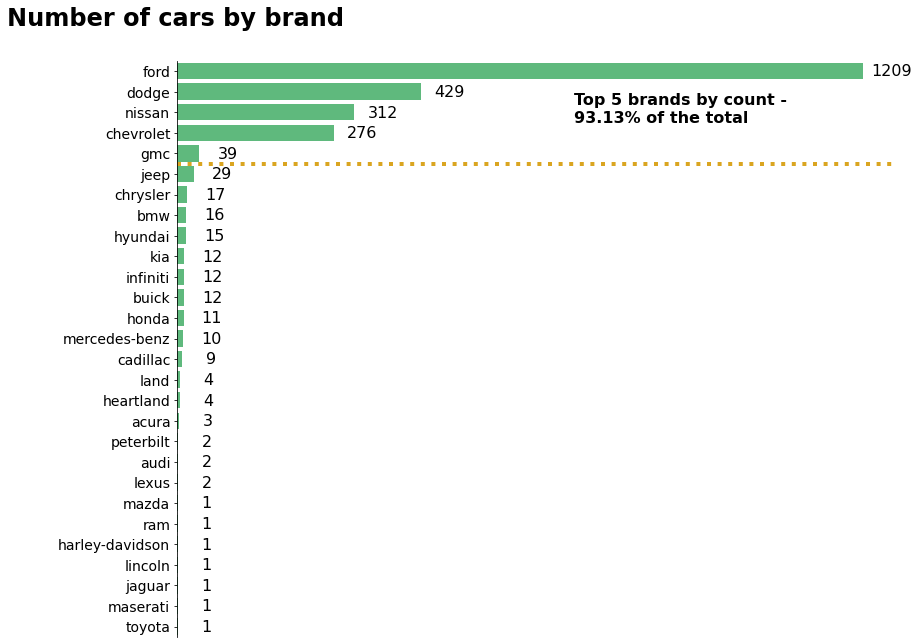

In [6]:
brand_count = df['brand'].value_counts().to_frame().reset_index()
brand_count.rename(columns={'index':'brand', 'brand':'count'}, inplace=True)
brand_count['percentages'] = brand_count['count']/sum(brand_count['count'])*100

fig = plt.figure(figsize=(10, 8))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y = brand_count['brand'], x = brand_count['count'], color = '#50c878', ax=axes)

plt.yticks(color='black', fontsize=14)
plt.xticks([])

axes.set_xlabel('')
axes.set_ylabel('')

axes.spines[['right', 'top', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (50+ width, y + height*0.8), ha='center', fontsize=16, color='black')

axes.axhline(4.51, linestyle = ':', color = 'goldenrod', xmin = 0, xmax = 1220, lw=4)

axes.text(700, 2.5, 
          f'''Top 5 brands by count - 
{round(sum(brand_count['percentages'][:5]),2)}% of the total''', 
          fontweight='bold', color='black', fontsize=16)
axes.text(-300, -2.2, 'Number of cars by brand', color='black', fontsize=24, fontweight='bold')
    
fig.show()

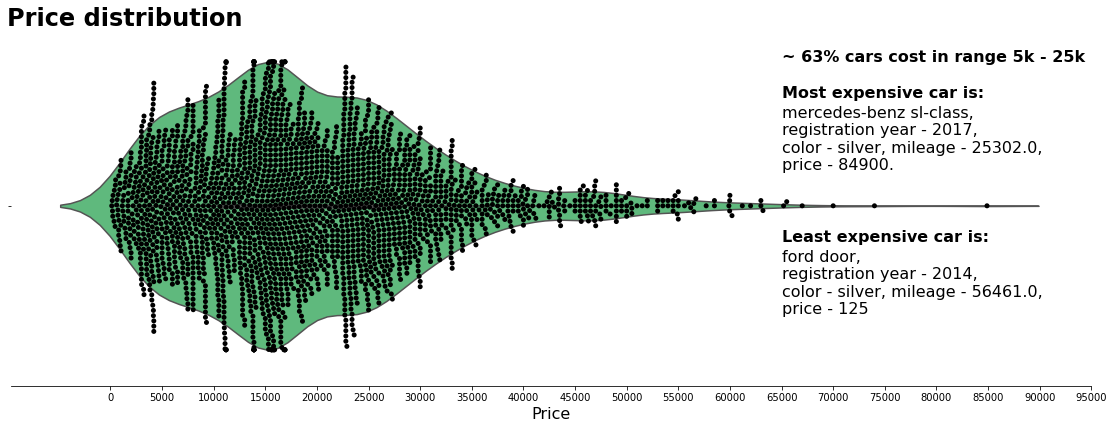

In [7]:
fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.violinplot(x=df['price'], color = '#50c878', ax=axes)
sns.swarmplot(x=df['price'], color = 'black', ax=axes)

axes.spines[['right', 'top', 'left']].set_visible(False)

axes.set_xlabel('Price', color='black', fontsize=16)

axes.set_xticks(range(0,100000, 5000))

axes.text(65000, -0.4, f"~ {round(len(df[df['price']>=5000][df[df['price']>=5000]['price']<=25000])/len(df)*100)}% cars cost in range 5k - 25k", fontsize=16, color='black', fontweight='bold')
axes.text(65000, -0.3, 'Most expensive car is:', fontsize=16, color='black', fontweight='bold')
axes.text(65000, -0.1, 
          f'''{df.sort_values(by='price', ascending=False).reset_index()['brand'][0]} {df.sort_values(by='price', ascending=False).reset_index()['model'][0]},
registration year - {df.sort_values(by='price', ascending=False).reset_index()['year'][0]},
color - {df.sort_values(by='price', ascending=False).reset_index()['color'][0]}, mileage - {df.sort_values(by='price', ascending=False).reset_index()['mileage'][0]},
price - {df.sort_values(by='price', ascending=False).reset_index()['price'][0]}.''', 
          fontsize=16, color='black')

axes.text(65000, 0.1, 'Least expensive car is:', fontsize=16, color='black', fontweight='bold')
axes.text(65000, 0.3, 
          f'''{df.sort_values(by='price').reset_index()['brand'][0]} {df.sort_values(by='price').reset_index()['model'][0]},
registration year - {df.sort_values(by='price').reset_index()['year'][0]},
color - {df.sort_values(by='price').reset_index()['color'][0]}, mileage - {df.sort_values(by='price').reset_index()['mileage'][0]},
price - {df.sort_values(by='price').reset_index()['price'][0]}''', 
          fontsize=16, color='black')
axes.text(-10000, -0.5, 'Price distribution', color='black', fontsize=24, fontweight='bold')

fig.show()

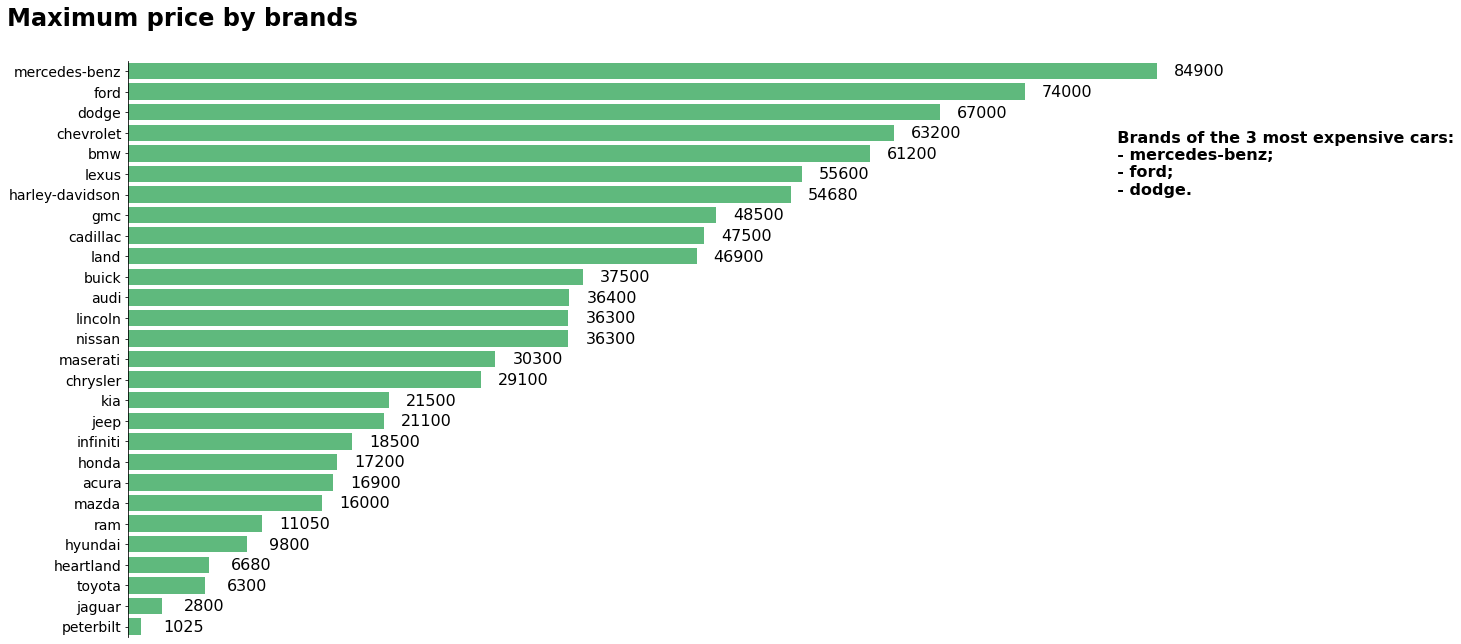

In [8]:
max_price_brand = df.groupby('brand')['price'].max().to_frame().reset_index().sort_values(by='price', ascending=False)
mean_price_brand = df.groupby('brand')['price'].mean().to_frame().reset_index().sort_values(by='price', ascending=False)

fig = plt.figure(figsize=(15,8))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y=max_price_brand['brand'], x=max_price_brand['price'], color='#50c878', ax=axes)

plt.yticks(color='black', fontsize=14)
plt.xticks([])

axes.set_xlabel('')
axes.set_ylabel('')

axes.spines[['right', 'top', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (3500 + width, y + height*0.8), ha='center', fontsize=16, color='black')
    
axes.text(77000, 6, 
          f'''          Brands of the 3 most expensive cars:
          - {max_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][0]};
          - {max_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][1]};
          - {max_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][2]}.''', color='black', fontsize=16, fontweight='bold')
axes.text(-10000, -2.2, 'Maximum price by brands', color='black', fontsize=24, fontweight='bold')
fig.show()

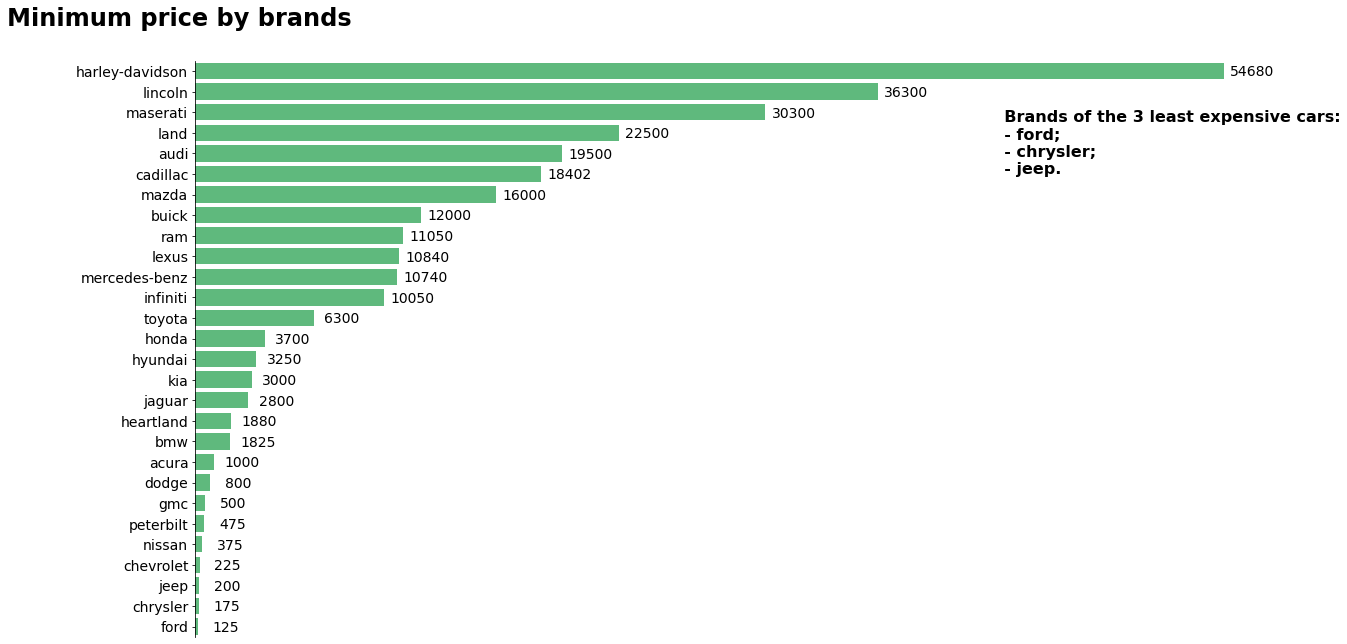

In [9]:
min_price_brand = df.groupby('brand')['price'].min().to_frame().reset_index().sort_values(by='price', ascending=False)

fig = plt.figure(figsize=(15,8))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y=min_price_brand['brand'], x=min_price_brand['price'], color='#50c878', ax=axes)

plt.yticks(color='black', fontsize=14)
plt.xticks([])

axes.set_xlabel('')
axes.set_ylabel('')

axes.spines[['right', 'top', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(width), (1500 + width, y + height*0.8), ha='center', fontsize=14, color='black')
    
axes.text(40000, 5, 
          f'''          Brands of the 3 least expensive cars:
          - {min_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][27]};
          - {min_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][26]};
          - {min_price_brand.sort_values(by='price', ascending=False).reset_index()['brand'][25]}.''', color='black', fontsize=16, fontweight='bold')
axes.text(-10000, -2.2, 'Minimum price by brands', color='black', fontsize=24, fontweight='bold')
fig.show()


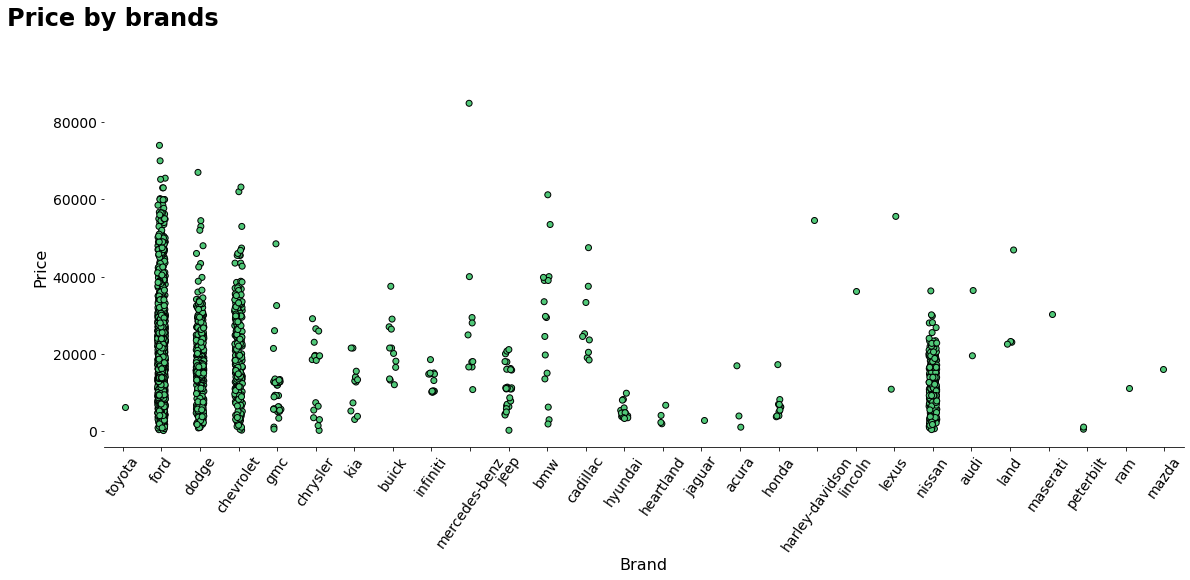

In [10]:
fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.stripplot(x=df['brand'], y=df['price'], ax=axes, color='#50c878', size=6, linewidth=1, edgecolor='black')

axes.spines[['left', 'top', 'right']].set_visible(False)

axes.set_xlabel('Brand', color='black', fontsize=16)
axes.set_ylabel('Price', color='black', fontsize=16)

plt.xticks(rotation=55, fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

axes.text(-3, 105000, 'Price by brands', color='black', fontsize=24, fontweight='bold')

fig.show()

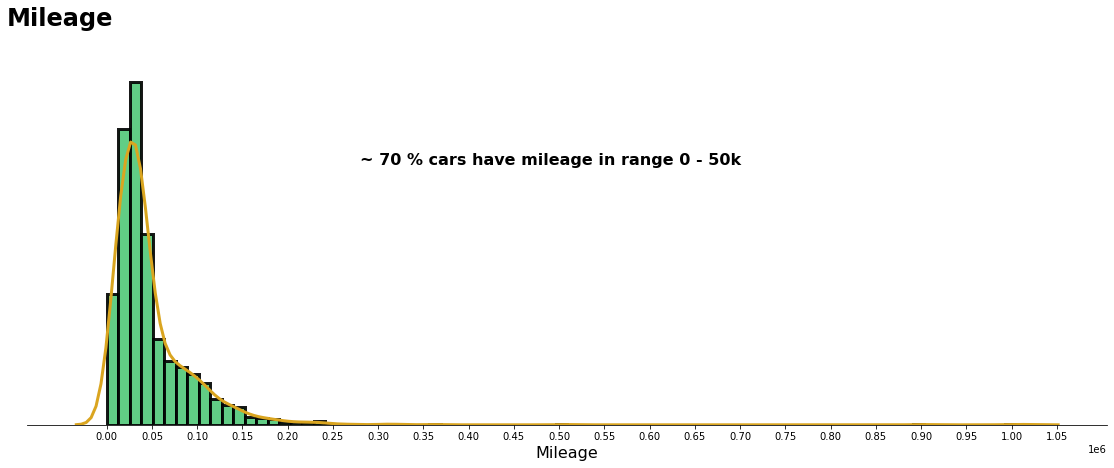

In [11]:
fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.distplot(x=df['mileage'], color='#50c878', hist_kws = dict(alpha=0.9, edgecolor='black', lw=3),
             kde_kws=dict(color='goldenrod', lw=3), bins=80)

axes.set_xlabel('Mileage', color='black', fontsize=16)
axes.set_ylabel('')

axes.text(280000, 0.000015, 
          f'''~ {round(len(df[df['mileage']<=50000])/len(df)*100)} % cars have mileage in range 0 - 50k''', fontsize=16, color='black', fontweight='bold')

axes.set_xticks(range(0,1100000, 50000))
axes.set_yticks([])

axes.text(-110000, 0.000023, 'Mileage', color='black', fontsize=24, fontweight='bold')

axes.spines[['right', 'top', 'left']].set_visible(False)

fig.show()

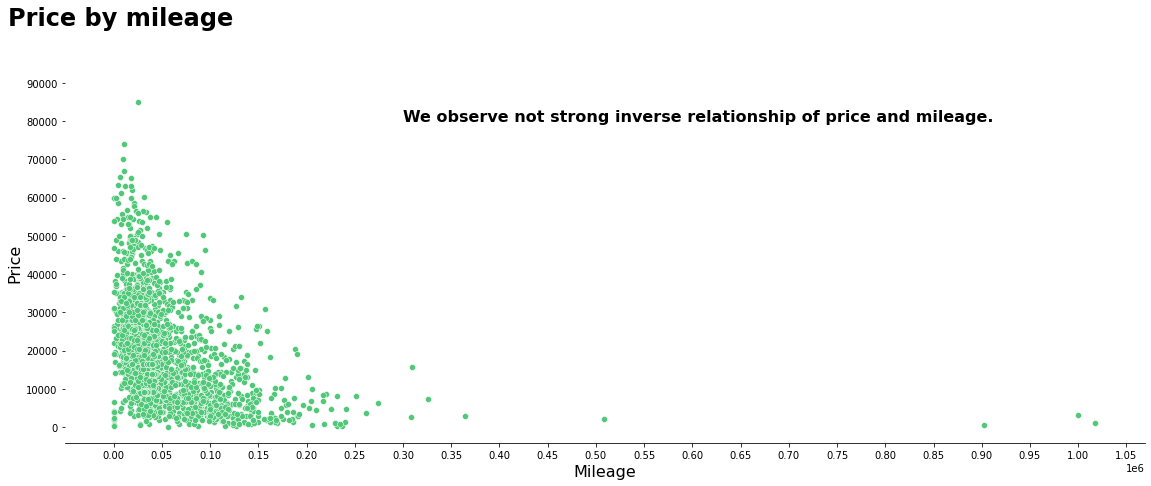

In [12]:
fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(x=df['mileage'], y=df['price'], color='#50c878')

axes.spines[['right', 'top', 'left']].set_visible(False)

axes.set_xticks(range(0,1100000, 50000))
axes.set_yticks(range(0,100000, 10000))

axes.set_xlabel('Mileage', color='black', fontsize=16)
axes.set_ylabel('Price', color='black', fontsize=16)

axes.text(300000, 80000, 'We observe not strong inverse relationship of price and mileage.', fontsize=16, color='black', fontweight='bold')
axes.text(-110000, 105000, 'Price by mileage', color='black', fontsize=24, fontweight='bold')

fig.show()

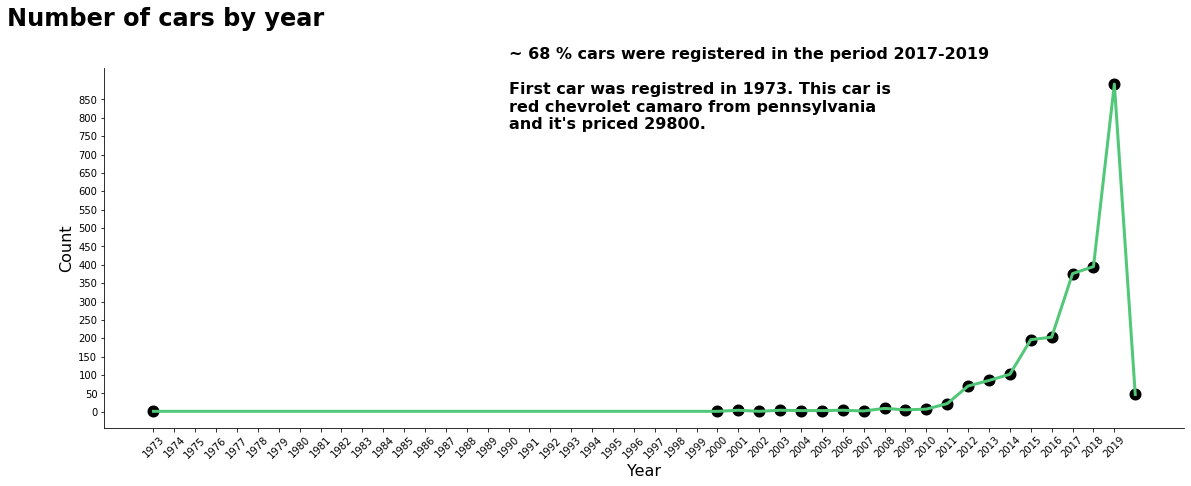

In [13]:
year_count = df['year'].value_counts().to_frame().reset_index()
year_count.rename(columns={'index':'year', 'year':'count'}, inplace=True)
year_count['percentages'] = year_count['count']/sum(year_count['count'])*100

fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x=year_count['year'], y=year_count['count'], ax=axes, color='#50c878', lw=3)
axes.scatter(x=year_count['year'], y=year_count['count'], color='black', lw=6)

axes.set_xlabel('Year', color='black', fontsize=16)
axes.set_ylabel('Count', color='black', fontsize=16)

axes.spines[['right', 'top']].set_visible(False)

plt.xticks(range(year_count['year'].min(), year_count['year'].max()), rotation=45)
plt.yticks(range(0, year_count['count'].max(), 50))

axes.text(1990, 770, 
          f'''~ {round(sum(year_count['percentages'][:3]))} % cars were registered in the period 2017-2019
          
First car was registred in {df['year'].min()}. This car is
{df.sort_values(by='year').reset_index()['color'][0]} {df.sort_values(by='year').reset_index()['brand'][0]} {df.sort_values(by='year').reset_index()['model'][0]} from {df.sort_values(by='year').reset_index()['state'][0]}
and it's priced {df.sort_values(by='year').reset_index()['price'][0]}.''', fontsize=16, color='black', fontweight='bold')

axes.text(1966, 1050, 'Number of cars by year', color='black', fontsize=24, fontweight='bold')

fig.show()

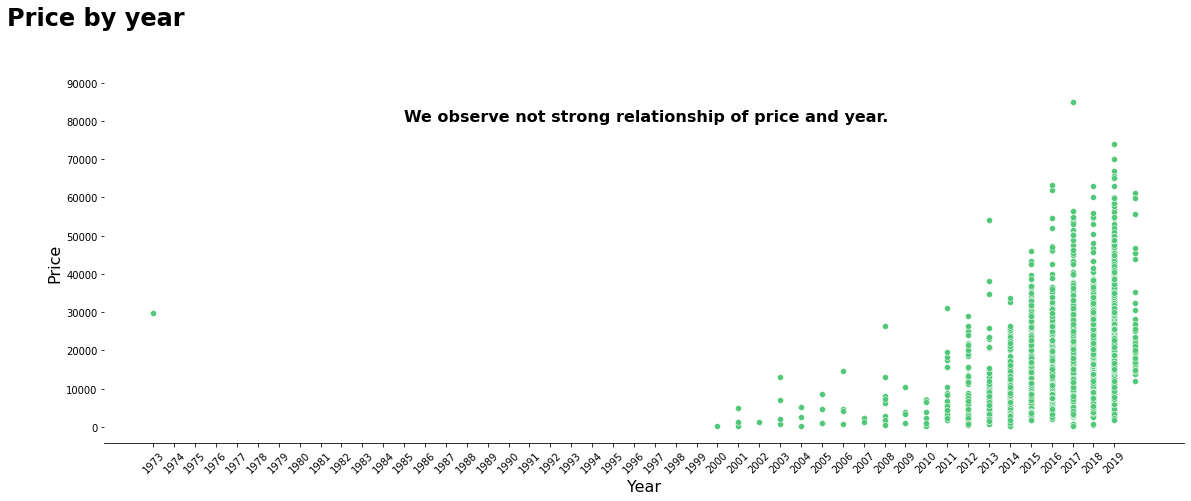

In [14]:
fig = plt.figure(figsize=(15, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(x=df['year'], y=df['price'], color='#50c878')

axes.spines[['right', 'top', 'left']].set_visible(False)

plt.xticks(range(year_count['year'].min(), year_count['year'].max()), rotation=45)
plt.yticks(range(0,100000, 10000))

axes.set_xlabel('Year', color='black', fontsize=16)
axes.set_ylabel('Price', color='black', fontsize=16)

axes.text(1985, 80000, 'We observe not strong relationship of price and year.', fontsize=16, color='black', fontweight='bold')
axes.text(1966, 105000, 'Price by year', color='black', fontsize=24, fontweight='bold')

fig.show()